# Motif Density Analysis

In [180]:
library(ggplot2)
library(patchwork)
library(cowplot)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [108]:
oct_accs_dens = read.table("./motif_analysis/density/oct4_no_fib_accs.density.txt", sep='\t', header=T)
oct_notaccs_dens = read.table("./motif_analysis/density/oct4_no_fib_notaccs.density.txt", sep='\t', header=T)
sox_accs_dens = read.table("./motif_analysis/density/sox2_no_fib_accs.density.txt", sep='\t', header=T)
sox_notaccs_dens = read.table("./motif_analysis/density/sox2_no_fib_notaccs.density.txt", sep='\t', header=T)
klf_accs_dens = read.table("./motif_analysis/density/klf4_no_fib_accs.density.txt", sep='\t', header=T)
klf_notaccs_dens = read.table("./motif_analysis/density/klf4_no_fib_notaccs.density.txt", sep='\t', header=T)

In [109]:
head(sox_accs_dens)

,Distance.from.Center..cmd.annotatePeaks.pl....sox_no_fib_accs.bed.hg38..size.1000..hist.5..m.OCT4.motif.SOX2.motif.KLF4.motif.OCT.SOX.motif.AP1.motif.,Oct4.POU.Homeobox..mES.Oct4.ChIP.Seq.GSE11431..Homer.BestGuess.Oct4.POU.Homeobox..mES.Oct4.ChIP.Seq.GSE11431..Homer.1.000..total.sites,Oct4.POU.Homeobox..mES.Oct4.ChIP.Seq.GSE11431..Homer.BestGuess.Oct4.POU.Homeobox..mES.Oct4.ChIP.Seq.GSE11431..Homer.1.000....sites,Oct4.POU.Homeobox..mES.Oct4.ChIP.Seq.GSE11431..Homer.BestGuess.Oct4.POU.Homeobox..mES.Oct4.ChIP.Seq.GSE11431..Homer.1.000....sites.1,Sox2.HMG..mES.Sox2.ChIP.Seq.GSE11431..Homer.BestGuess.Sox2.HMG..mES.Sox2.ChIP.Seq.GSE11431..Homer.1.000..total.sites,Sox2.HMG..mES.Sox2.ChIP.Seq.GSE11431..Homer.BestGuess.Sox2.HMG..mES.Sox2.ChIP.Seq.GSE11431..Homer.1.000....sites,Sox2.HMG..mES.Sox2.ChIP.Seq.GSE11431..Homer.BestGuess.Sox2.HMG..mES.Sox2.ChIP.Seq.GSE11431..Homer.1.000....sites.1,Klf4.Zf..mES.Klf4.ChIP.Seq.GSE11431..Homer.BestGuess.Klf4.Zf..mES.Klf4.ChIP.Seq.GSE11431..Homer.1.000..total.sites,Klf4.Zf..mES.Klf4.ChIP.Seq.GSE11431..Homer.BestGuess.Klf4.Zf..mES.Klf4.ChIP.Seq.GSE11431..Homer.1.000....sites,Klf4.Zf..mES.Klf4.ChIP.Seq.GSE11431..Homer.BestGuess.Klf4.Zf..mES.Klf4.ChIP.Seq.GSE11431..Homer.1.000....sites.1,OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG..mES.Oct4.ChIP.Seq.GSE11431..Homer.BestGuess.OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG..mES.Oct4.ChIP.Seq.GSE11431..Homer.1.000..total.sites,OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG..mES.Oct4.ChIP.Seq.GSE11431..Homer.BestGuess.OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG..mES.Oct4.ChIP.Seq.GSE11431..Homer.1.000....sites,OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG..mES.Oct4.ChIP.Seq.GSE11431..Homer.BestGuess.OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG..mES.Oct4.ChIP.Seq.GSE11431..Homer.1.000....sites.1,AP.1.bZIP..ThioMac.PU.1.ChIP.Seq.GSE21512..Homer.BestGuess.AP.1.bZIP..ThioMac.PU.1.ChIP.Seq.GSE21512..Homer.1.000..total.sites,AP.1.bZIP..ThioMac.PU.1.ChIP.Seq.GSE21512..Homer.BestGuess.AP.1.bZIP..ThioMac.PU.1.ChIP.Seq.GSE21512..Homer.1.000....sites,AP.1.bZIP..ThioMac.PU.1.ChIP.Seq.GSE21512..Homer.BestGuess.AP.1.bZIP..ThioMac.PU.1.ChIP.Seq.GSE21512..Homer.1.000....sites.1,A.frequency,C.frequency,G.frequency,T.frequency
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-500,0.0000000000,9.917355e-05,0.0000000000,0.0000000000,1.652893e-04,0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.611570e-05,0.000000e+00,0.0000000000,0.0001652893,0.0000000000,0.3203857,0.1773553,0.1793937,0.3228650
2,-495,0.0003636364,9.917355e-05,0.0000000000,0.0004297521,2.644628e-04,0.0000000000,3.305785e-05,0.000000e+00,0.000000e+00,3.305785e-05,0.000000e+00,0.000000e+00,0.0004958678,0.0003966942,0.0000000000,0.3188098,0.1814216,0.1790414,0.3207272
3,-490,0.0003305785,2.644628e-04,0.0002644628,0.0005289256,2.644628e-04,0.0002644628,3.305785e-05,0.000000e+00,3.305785e-05,1.652893e-04,9.917355e-05,0.000000e+00,0.0007933884,0.0002644628,0.0003305785,0.3145124,0.1807272,0.1800000,0.3247604
4,-485,0.0003966942,2.644628e-04,0.0002314050,0.0004628099,2.975207e-04,0.0002644628,6.611570e-05,3.305785e-05,3.305785e-05,1.322314e-04,1.983471e-04,1.322314e-04,0.0005950413,0.0003966942,0.0003966942,0.3184464,0.1827438,0.1761652,0.3226446
5,-480,0.0004297521,1.322314e-04,0.0001322314,0.0006611570,1.652893e-04,0.0001983471,9.917355e-05,3.305785e-05,6.611570e-05,1.983471e-04,1.652893e-04,9.917355e-05,0.0008264463,0.0003966942,0.0003305785,0.3191076,0.1789092,0.1795702,0.3224132
6,-475,0.0003305785,2.975207e-04,0.0001652893,0.0003636364,9.917355e-05,0.0003636364,1.322314e-04,9.917355e-05,6.611570e-05,2.975207e-04,1.652893e-04,6.611570e-05,0.0007272727,0.0001652893,0.0004297521,0.3104134,0.1852896,0.1779834,0.3263142


In [110]:
mean(sox_accs_dens[,11])
mean(sox_notaccs_dens[,11])

[1] 0.0003203816

[1] 0.0002356201

In [142]:
# see README in "motif_analysis/density/"
MOTIFS = c("OCT4", "SOX2", "KLF4", "OCTSOX", "AP1")

# based on structure of HOMER output file
MOTIF_IDXS = c(1,2,5, 8, 11, 14)

In [189]:
oct_plot_df_notaccs = oct_notaccs_dens[, MOTIF_IDXS]
oct_plot_df_accs = oct_accs_dens[, MOTIF_IDXS]
colnames(oct_plot_df_notaccs) = c("x", MOTIFS)
colnames(oct_plot_df_accs) = c("x", MOTIFS)
oct_plot_df_notaccs$type = "Inaccessible"
oct_plot_df_accs$type = "Accessible"

sox_plot_df_notaccs = sox_notaccs_dens[, MOTIF_IDXS]
sox_plot_df_accs = sox_accs_dens[, MOTIF_IDXS]
colnames(sox_plot_df_notaccs) = c("x", MOTIFS)
colnames(sox_plot_df_accs) = c("x", MOTIFS)
sox_plot_df_notaccs$type = "Inaccessible"
sox_plot_df_accs$type = "Accessible"

klf_plot_df_notaccs = klf_notaccs_dens[, MOTIF_IDXS]
klf_plot_df_accs = klf_accs_dens[, MOTIF_IDXS]
colnames(klf_plot_df_notaccs) = c("x", MOTIFS)
colnames(klf_plot_df_accs) = c("x", MOTIFS)
klf_plot_df_notaccs$type = "Inaccessible"
klf_plot_df_accs$type = "Accessible"

In [220]:
density_plot <- function(df_accs, df_not_accs, tf, xlab=T, ylab=T, title=T, ymin=F, ymax=F) {
    p <- ggplot(rbind(df_accs, df_not_accs)) +
    geom_smooth(aes_string(x="x", y=tf, color="type")) +
    theme_bw(base_size = 16) +
    xlab("Position relative to peak") +
    ylab("Density") +
    theme(legend.position="none")
    
    if ((ymin!=F) && (ymax!=F)) {
        p = p +coord_cartesian(ylim=c(ymin, ymax))
    }
    
    if (title==T) {
        p = p + ggtitle(tf) + theme(plot.title = element_text(hjust = 0.5))
    }
    
    if (ylab==F) {
        p = p + theme(axis.title.y=element_blank())
    }
    
    if (xlab==F) {
        p = p + theme(axis.title.x=element_blank())
    }
    
    p
}

In [242]:
oct_plots = list()
sox_plots = list()
klf_plots = list()

# adjust y limits in order to keep same min, max values for OSK
# hand adjusted
YMINS = c(2e-4, 3e-4, 4e-5, 4e-5, 4e-4)
YMAXS = c(9e-4, 2.2e-3, 2e-3, 5e-4, 1.4e-3)

for (i in seq(length(MOTIFS))) {
    ylab=F
    if (i==1) {
        ylab=T
    }
    
    oct_plots[[i]] = density_plot(oct_plot_df_accs, oct_plot_df_notaccs, MOTIFS[i], xlab=F, ylab=ylab, title=T, ymin=YMINS[i], ymax=YMAXS[i])
    sox_plots[[i]] = density_plot(sox_plot_df_accs, sox_plot_df_notaccs, MOTIFS[i], xlab=F, ylab=ylab, title=F, ymin=YMINS[i], ymax=YMAXS[i])
    klf_plots[[i]] = density_plot(klf_plot_df_accs, klf_plot_df_notaccs, MOTIFS[i], xlab=T, ylab=ylab, title=F, ymin=YMINS[i], ymax=YMAXS[i])
}

In [243]:
# should not get warning
# Warning message:
# “Removed 59 rows containing non-finite values (stat_smooth).”

legend = get_legend(oct_plots[[1]] +theme(legend.position="right"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



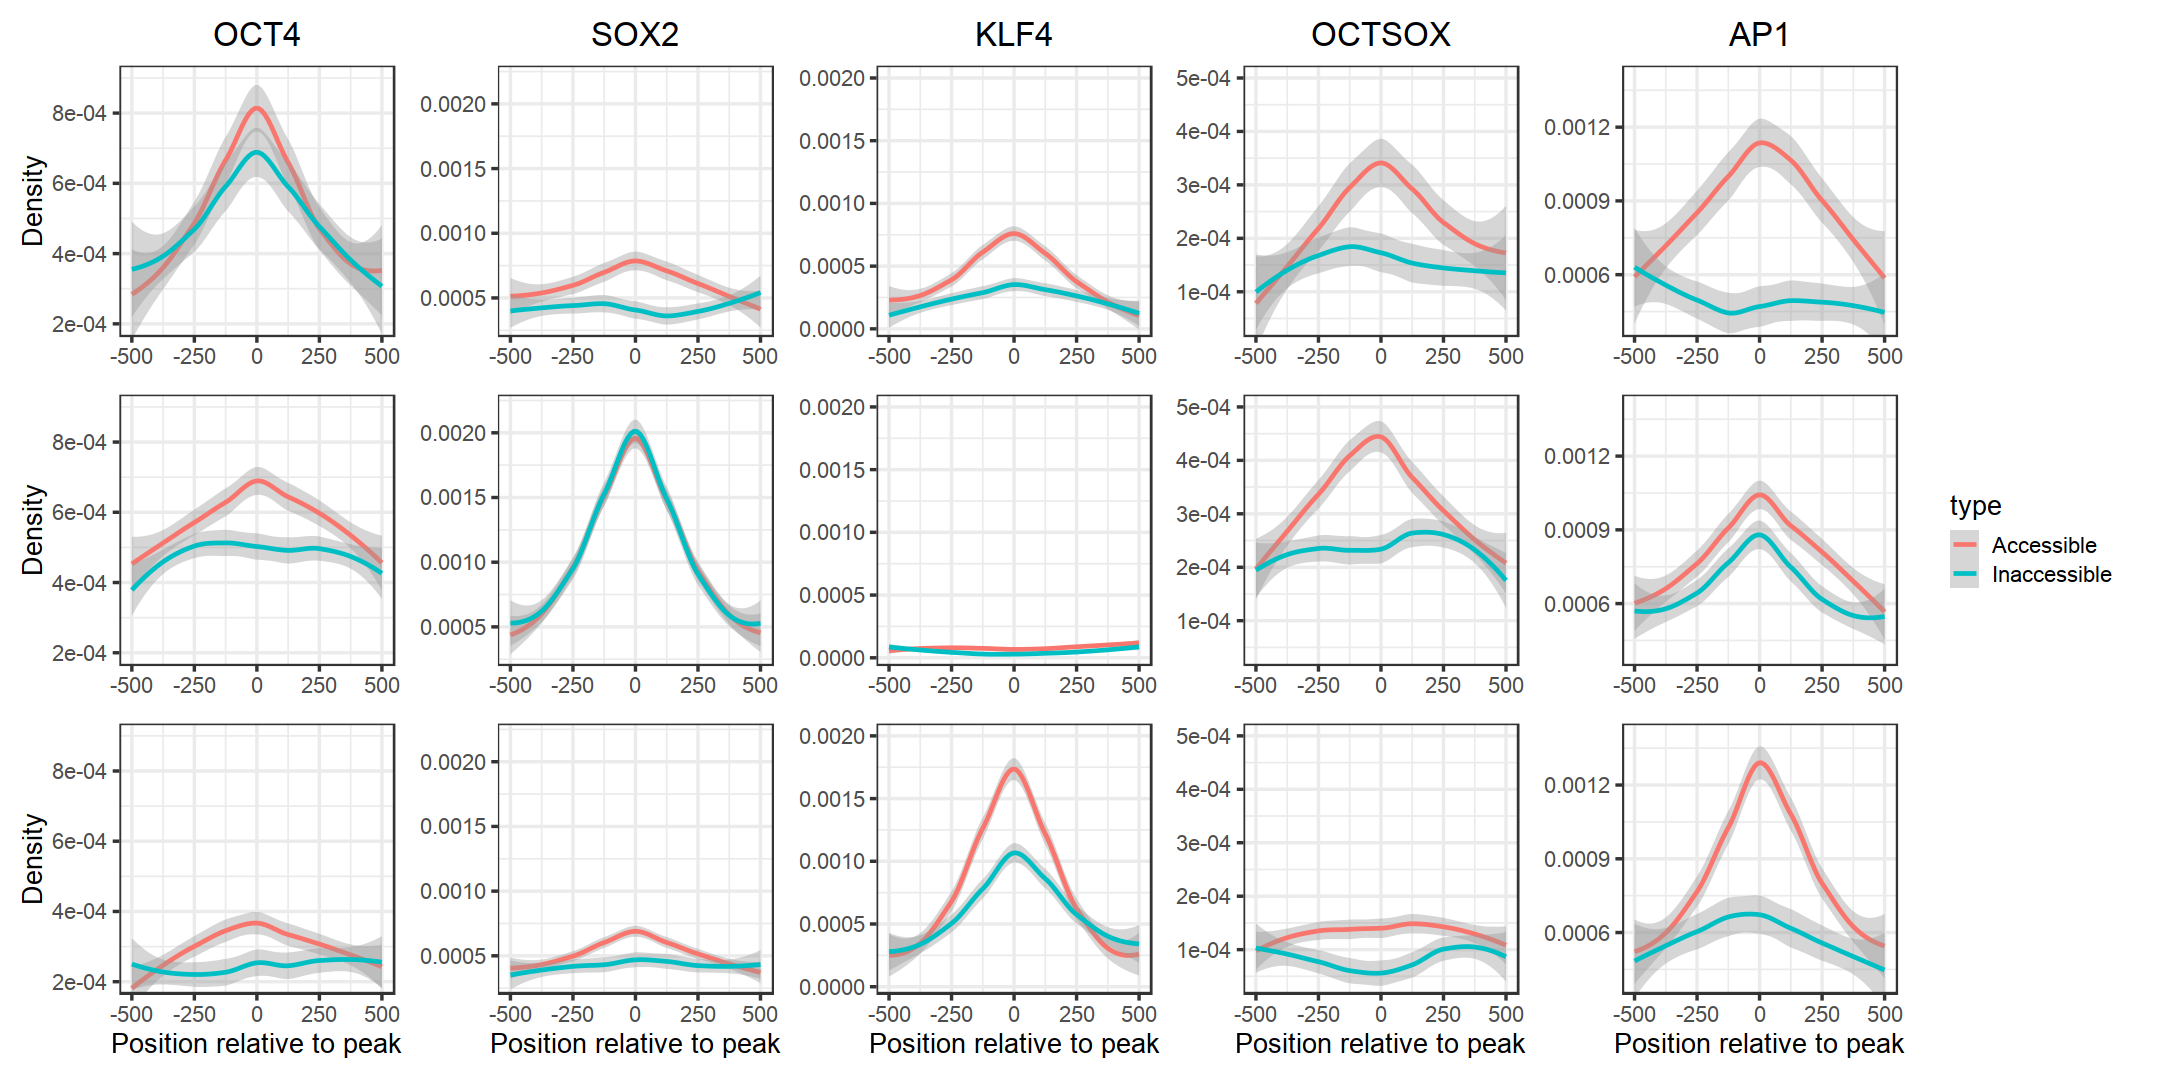

In [244]:
options(repr.plot.width = 18, repr.plot.height = 9)

plots <- wrap_plots(c(oct_plots,
            sox_plots,
            klf_plots),
              nrow=3)

plots <- wrap_plots(plots,
                   legend,
                   widths=c(16,2))

plots